* 데이터 수집      
  http://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do

In [233]:
!sudo apt install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 데이터 확인 및 전처리
 * 월별, 시간대별, 역별 지하철 승하차정보 데이터이다.

In [3]:
df = pd.read_csv('./서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding='cp949')

In [4]:
df.head(2)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202108,1호선,동대문,415,11,10380,1815,7880,5352,12037,...,5983,7,1043,2,2,0,2,0,0,20210903
1,202108,1호선,동묘앞,84,3,2861,918,3286,4614,5128,...,1759,4,827,0,0,0,0,0,0,20210903


In [5]:
df.tail(2)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
46550,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223
46551,201501,중앙선,회기,436,3,10929,3067,23317,10430,65043,...,35702,767,9314,0,0,0,0,0,0,20151223


## 데이터 크기 

In [6]:
df.shape

(46552, 52)

## 결측치 확인

In [7]:
df.isnull().sum()

사용월             0
호선명             0
지하철역            0
04시-05시 승차인원    0
04시-05시 하차인원    0
05시-06시 승차인원    0
05시-06시 하차인원    0
06시-07시 승차인원    0
06시-07시 하차인원    0
07시-08시 승차인원    0
07시-08시 하차인원    0
08시-09시 승차인원    0
08시-09시 하차인원    0
09시-10시 승차인원    0
09시-10시 하차인원    0
10시-11시 승차인원    0
10시-11시 하차인원    0
11시-12시 승차인원    0
11시-12시 하차인원    0
12시-13시 승차인원    0
12시-13시 하차인원    0
13시-14시 승차인원    0
13시-14시 하차인원    0
14시-15시 승차인원    0
14시-15시 하차인원    0
15시-16시 승차인원    0
15시-16시 하차인원    0
16시-17시 승차인원    0
16시-17시 하차인원    0
17시-18시 승차인원    0
17시-18시 하차인원    0
18시-19시 승차인원    0
18시-19시 하차인원    0
19시-20시 승차인원    0
19시-20시 하차인원    0
20시-21시 승차인원    0
20시-21시 하차인원    0
21시-22시 승차인원    0
21시-22시 하차인원    0
22시-23시 승차인원    0
22시-23시 하차인원    0
23시-24시 승차인원    0
23시-24시 하차인원    0
00시-01시 승차인원    0
00시-01시 하차인원    0
01시-02시 승차인원    0
01시-02시 하차인원    0
02시-03시 승차인원    0
02시-03시 하차인원    0
03시-04시 승차인원    0
03시-04시 하차인원    0
작업일자            0
dtype: int64

## 컬럼별 데이터 확인

In [8]:
# 사용월
df['사용월'].unique()

array([202108, 202107, 202106, 202105, 202104, 202103, 202102, 202101,
       202012, 202011, 202010, 202009, 202008, 202007, 202006, 202005,
       202004, 202003, 202002, 202001, 201912, 201911, 201910, 201909,
       201908, 201907, 201906, 201905, 201904, 201903, 201902, 201901,
       201812, 201811, 201810, 201809, 201808, 201807, 201806, 201805,
       201804, 201803, 201802, 201801, 201712, 201711, 201710, 201709,
       201708, 201707, 201706, 201705, 201704, 201703, 201702, 201701,
       201612, 201611, 201610, 201609, 201608, 201607, 201606, 201605,
       201604, 201603, 201602, 201601, 201512, 201511, 201510, 201509,
       201508, 201507, 201506, 201505, 201504, 201503, 201502, 201501])

In [9]:
# 호선명
df['호선명'].unique()

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선',
       '과천선', '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선', '9호선2단계'],
      dtype=object)

## 데이터 타입 확인 및 변경

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46552 entries, 0 to 46551
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           46552 non-null  int64 
 1   호선명           46552 non-null  object
 2   지하철역          46552 non-null  object
 3   04시-05시 승차인원  46552 non-null  int64 
 4   04시-05시 하차인원  46552 non-null  int64 
 5   05시-06시 승차인원  46552 non-null  int64 
 6   05시-06시 하차인원  46552 non-null  int64 
 7   06시-07시 승차인원  46552 non-null  int64 
 8   06시-07시 하차인원  46552 non-null  int64 
 9   07시-08시 승차인원  46552 non-null  int64 
 10  07시-08시 하차인원  46552 non-null  int64 
 11  08시-09시 승차인원  46552 non-null  int64 
 12  08시-09시 하차인원  46552 non-null  int64 
 13  09시-10시 승차인원  46552 non-null  int64 
 14  09시-10시 하차인원  46552 non-null  int64 
 15  10시-11시 승차인원  46552 non-null  int64 
 16  10시-11시 하차인원  46552 non-null  int64 
 17  11시-12시 승차인원  46552 non-null  int64 
 18  11시-12시 하차인원  46552 non-null  int64 
 19  12시-

In [11]:
df['사용월'] = df['사용월'].astype(str)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46552 entries, 0 to 46551
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           46552 non-null  object
 1   호선명           46552 non-null  object
 2   지하철역          46552 non-null  object
 3   04시-05시 승차인원  46552 non-null  int64 
 4   04시-05시 하차인원  46552 non-null  int64 
 5   05시-06시 승차인원  46552 non-null  int64 
 6   05시-06시 하차인원  46552 non-null  int64 
 7   06시-07시 승차인원  46552 non-null  int64 
 8   06시-07시 하차인원  46552 non-null  int64 
 9   07시-08시 승차인원  46552 non-null  int64 
 10  07시-08시 하차인원  46552 non-null  int64 
 11  08시-09시 승차인원  46552 non-null  int64 
 12  08시-09시 하차인원  46552 non-null  int64 
 13  09시-10시 승차인원  46552 non-null  int64 
 14  09시-10시 하차인원  46552 non-null  int64 
 15  10시-11시 승차인원  46552 non-null  int64 
 16  10시-11시 하차인원  46552 non-null  int64 
 17  11시-12시 승차인원  46552 non-null  int64 
 18  11시-12시 하차인원  46552 non-null  int64 
 19  12시-

## 불필요한 컬럼 삭제

In [13]:
df.drop(['작업일자'], axis=1, inplace=True)

## 승차/하차 테이블 분리

### 승차 테이블 만들기

In [14]:
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202108,1호선,동대문,415,11,10380,1815,7880,5352,12037,...,1633,5983,7,1043,2,2,0,2,0,0
1,202108,1호선,동묘앞,84,3,2861,918,3286,4614,5128,...,577,1759,4,827,0,0,0,0,0,0
2,202108,1호선,서울역,483,11,7963,5533,10871,31479,31643,...,7756,4968,21,444,1,1,0,0,0,0
3,202108,1호선,시청,6,0,1597,4399,2727,17957,5971,...,2462,822,3,72,0,2,0,0,0,0
4,202108,1호선,신설동,247,6,6828,2721,7333,9771,14821,...,1352,3747,15,390,0,0,0,0,0,0


In [15]:
# 공통 컬럼
common_col = df[df.columns[0:3]]
# 승차 컬럼만 가져오기
in_col = df[df.columns[3::2]]

In [16]:
in_col.columns = in_col.columns.str.split(' ').str[0]

In [17]:
in_col.head()

,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,415,10380,7880,12037,16637,15671,13922,15675,18244,19566,...,20332,13464,10336,9669,6514,1633,7,2,0,0
1,84,2861,3286,5128,8066,7541,9130,13369,18112,21526,...,19551,8704,5031,4235,2678,577,4,0,0,0
2,483,7963,10871,31643,49003,36383,35273,41477,48720,50740,...,152659,72119,47289,51106,27974,7756,21,1,0,0
3,6,1597,2727,5971,6884,7541,8328,12240,13561,15934,...,119064,41635,31787,27796,13739,2462,3,0,0,0
4,247,6828,7333,14821,20523,14881,13551,15578,16289,17701,...,48482,18413,11610,9764,5955,1352,15,0,0,0


In [18]:
# 공통컬럼과 승차컬럼 연결하기
df_in = pd.concat([common_col, in_col], axis=1)
df_in.head()

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,202108,1호선,동대문,415,10380,7880,12037,16637,15671,13922,...,20332,13464,10336,9669,6514,1633,7,2,0,0
1,202108,1호선,동묘앞,84,2861,3286,5128,8066,7541,9130,...,19551,8704,5031,4235,2678,577,4,0,0,0
2,202108,1호선,서울역,483,7963,10871,31643,49003,36383,35273,...,152659,72119,47289,51106,27974,7756,21,1,0,0
3,202108,1호선,시청,6,1597,2727,5971,6884,7541,8328,...,119064,41635,31787,27796,13739,2462,3,0,0,0
4,202108,1호선,신설동,247,6828,7333,14821,20523,14881,13551,...,48482,18413,11610,9764,5955,1352,15,0,0,0


## 하차 테이블 만들기

In [19]:
# 공통 컬럼
common_col
# 하차 컬럼만 가져오기
out_col = df[df.columns[4::2]]

In [20]:
out_col.columns = out_col.columns.str.split(' ').str[0]

In [21]:
# 공통컬럼과 하차컬럼 연결하기
df_out = pd.concat([common_col, out_col], axis=1)
df_out.head()

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,202108,1호선,동대문,11,1815,5352,9885,19783,19192,17298,...,16304,15398,10356,8870,7191,5983,1043,2,2,0
1,202108,1호선,동묘앞,3,918,4614,8004,18779,15213,17602,...,9210,5827,3835,3839,3706,1759,827,0,0,0
2,202108,1호선,서울역,11,5533,31479,73669,149249,94786,50691,...,61655,38909,25080,21490,13638,4968,444,1,0,0
3,202108,1호선,시청,0,4399,17957,53669,141150,60972,24743,...,11317,5636,3793,3501,2205,822,72,2,0,0
4,202108,1호선,신설동,6,2721,9771,21765,52910,28274,18729,...,22904,15802,10231,9428,7268,3747,390,0,0,0


# 출퇴근시간 역별 승하차인원 분석

* 최근 월을 기준으로 한 승하차 데이터프레임 생성

In [22]:
df_in_202108 = df_in[df_in.사용월 == '202108']

In [23]:
df_out_202108 = df_out[df_out.사용월 == '202108']

* 출근시간에 가장 많은 사람이 승차하는 역은 어디일까? (08시-09시)

In [24]:
df_in_202108.nlargest(5, '08시-09시')[['지하철역', '08시-09시']]

,지하철역,08시-09시
37,신림,267128
14,구로디지털단지,153411
28,서울대입구(관악구청),150090
83,연신내,132615
133,까치산,130443


* 출근시간에 가장 많은 사람이 하차하는 역은 어디일까?(09시-10시)

In [25]:
df_out_202108.nlargest(5, '09시-10시')[['지하철역', '09시-10시']]

,지하철역,09시-10시
10,강남,274355
43,역삼,226437
215,가산디지털단지,188412
30,선릉,178766
26,삼성(무역센터),172539


* 퇴근시간에 가장 많은 사람이 승차하는 역은 어디일까?(18시-19시)

In [26]:
df_in_202108.nlargest(5, '18시-19시')[['지하철역', '18시-19시']]

,지하철역,18시-19시
10,강남,302398
215,가산디지털단지,283125
30,선릉,245318
43,역삼,239209
26,삼성(무역센터),230299


* 퇴근시간에 가장 많은 사람이 하차하는 역은 어디일까?(19시-20시)

In [27]:
df_out_202108.nlargest(5, '19시-20시')[['지하철역', '19시-20시']]

,지하철역,19시-20시
37,신림,182832
28,서울대입구(관악구청),121426
52,잠실(송파구청),116568
14,구로디지털단지,107520
83,연신내,103283



# 강남역의 최근 시간대별 승하차정보 분석

## 강남역의 최근 승차정보 분석

In [28]:
# 강남역의 최근 승차 데이터 불러오기
df_in_gangnam = df_in_202108[df_in_202108.지하철역 == '강남'].iloc[:,3:]
df_in_gangnam

,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
10,64,4993,14177,31783,50239,40611,44108,59573,75942,88926,...,302398,178242,138452,157847,105997,12509,5,2,0,0


In [29]:
# melt
df_in_gangnam = df_in_gangnam.melt()
df_in_gangnam

,variable,value
0,04시-05시,64
1,05시-06시,4993
2,06시-07시,14177
3,07시-08시,31783
4,08시-09시,50239
5,09시-10시,40611
6,10시-11시,44108
7,11시-12시,59573
8,12시-13시,75942
9,13시-14시,88926


In [30]:
# 컬럼명 변경
df_in_gangnam.columns = ['시간대', '승차건수']
df_in_gangnam

,시간대,승차건수
0,04시-05시,64
1,05시-06시,4993
2,06시-07시,14177
3,07시-08시,31783
4,08시-09시,50239
5,09시-10시,40611
6,10시-11시,44108
7,11시-12시,59573
8,12시-13시,75942
9,13시-14시,88926


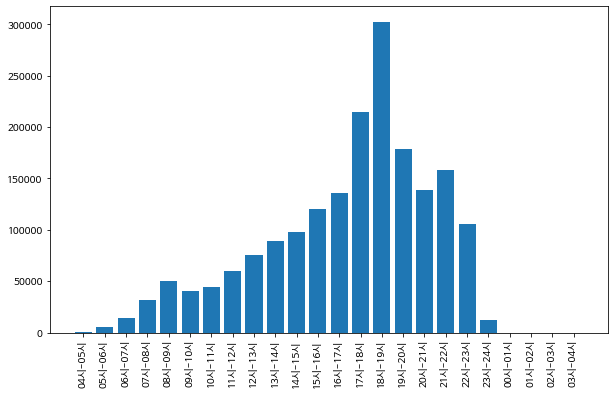

In [31]:
# 시간대별 승차인원 시각화하기
plt.figure(figsize=(10,6))
plt.bar(df_in_gangnam['시간대'], df_in_gangnam['승차건수'])
plt.xticks(rotation=90)
plt.show()

## 강남역의 최근 하차 정보 분석

In [32]:
# 강남역의 최근 하차 데이터 불러오기 
df_out_gangnam = df_out_202108[df_out_202108.지하철역 == '강남'].iloc[:,3:]
df_out_gangnam

,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
10,4,10411,45059,129595,269877,274355,129744,99120,96644,115153,...,125891,68747,34635,27783,21970,8377,15,1,0,0


In [33]:
# melt
df_out_gangnam = df_out_gangnam.melt()
df_out_gangnam

,variable,value
0,04시-05시,4
1,05시-06시,10411
2,06시-07시,45059
3,07시-08시,129595
4,08시-09시,269877
5,09시-10시,274355
6,10시-11시,129744
7,11시-12시,99120
8,12시-13시,96644
9,13시-14시,115153


In [34]:
# 컬럼명 변경
df_out_gangnam.columns = ['시간대', '하차건수']
df_out_gangnam

,시간대,하차건수
0,04시-05시,4
1,05시-06시,10411
2,06시-07시,45059
3,07시-08시,129595
4,08시-09시,269877
5,09시-10시,274355
6,10시-11시,129744
7,11시-12시,99120
8,12시-13시,96644
9,13시-14시,115153


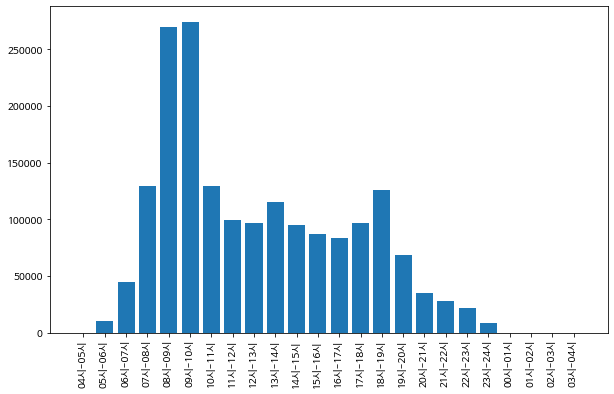

In [35]:
# 시간대별 하차인원 시각화하기
plt.figure(figsize=(10,6))
plt.bar(df_out_gangnam['시간대'], df_out_gangnam['하차건수'])
plt.xticks(rotation=90)
plt.show()

# 지하철 시간대별, 역별 이용현황 분석

## 시간대별 승차 현황

### 승차정보 집계 데이터 만들기

In [36]:
# df_in_202108카피하여 사용하기

In [37]:
df_in_copy = df_in_202108.copy()

In [38]:
# 인덱스 변경('지하철역')
df_in_copy.set_index('지하철역', inplace=True)
df_in_copy.head()

,사용월,호선명,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
지하철역,,,,,,,,,,,,,,,,,,,,,
동대문,202108,1호선,415,10380,7880,12037,16637,15671,13922,15675,...,20332,13464,10336,9669,6514,1633,7,2,0,0
동묘앞,202108,1호선,84,2861,3286,5128,8066,7541,9130,13369,...,19551,8704,5031,4235,2678,577,4,0,0,0
서울역,202108,1호선,483,7963,10871,31643,49003,36383,35273,41477,...,152659,72119,47289,51106,27974,7756,21,1,0,0
시청,202108,1호선,6,1597,2727,5971,6884,7541,8328,12240,...,119064,41635,31787,27796,13739,2462,3,0,0,0
신설동,202108,1호선,247,6828,7333,14821,20523,14881,13551,15578,...,48482,18413,11610,9764,5955,1352,15,0,0,0


In [39]:
# 컬럼 삭제('사용월','호선명','지하철역')
df_in_copy.drop(['사용월', '호선명'], axis=1, inplace=True)

In [40]:
df_in_copy.head(2)

,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
지하철역,,,,,,,,,,,,,,,,,,,,,
동대문,415,10380,7880,12037,16637,15671,13922,15675,18244,19566,...,20332,13464,10336,9669,6514,1633,7,2,0,0
동묘앞,84,2861,3286,5128,8066,7541,9130,13369,18112,21526,...,19551,8704,5031,4235,2678,577,4,0,0,0


In [41]:
# 행,열 합계

In [42]:
df_in_copy.loc['시간대합계',:] = df_in_copy.sum(axis=0)
df_in_copy.tail()

,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
지하철역,,,,,,,,,,,,,,,,,,,,,
중랑,200.0,5961.0,8782.0,19739.0,18610.0,13213.0,8053.0,7475.0,7112.0,7262.0,...,6531.0,4213.0,2938.0,2513.0,1654.0,430.0,5.0,0.0,0.0,0.0
지평,0.0,1.0,2.0,347.0,218.0,18.0,325.0,2.0,4.0,65.0,...,35.0,215.0,2.0,27.0,14.0,0.0,0.0,0.0,0.0,0.0
팔당,1.0,212.0,788.0,1261.0,1267.0,1123.0,1208.0,1127.0,1339.0,1521.0,...,2857.0,2067.0,2057.0,1927.0,559.0,56.0,0.0,0.0,0.0,0.0
회기,719.0,11133.0,18619.0,47471.0,59922.0,39563.0,31469.0,31674.0,33153.0,30224.0,...,38115.0,21128.0,17210.0,17437.0,13269.0,3634.0,63.0,0.0,0.0,0.0
시간대합계,125592.0,2679895.0,5392644.0,13007398.0,14639529.0,8962001.0,6688112.0,6762631.0,7277223.0,7301932.0,...,17191309.0,8671470.0,6611588.0,6032973.0,3852573.0,744365.0,6086.0,26.0,3.0,1.0


In [43]:
df_in_copy['역합계'] = df_in_copy.sum(axis=1)
df_in_copy.head(2)

,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,...,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시,역합계
지하철역,,,,,,,,,,,,,,,,,,,,,
동대문,415.0,10380.0,7880.0,12037.0,16637.0,15671.0,13922.0,15675.0,18244.0,19566.0,...,13464.0,10336.0,9669.0,6514.0,1633.0,7.0,2.0,0.0,0.0,274678.0
동묘앞,84.0,2861.0,3286.0,5128.0,8066.0,7541.0,9130.0,13369.0,18112.0,21526.0,...,8704.0,5031.0,4235.0,2678.0,577.0,4.0,0.0,0.0,0.0,229111.0


### 시간대별 승차건수 

In [44]:
df_in_time = df_in_copy.loc['시간대합계'][:-1]

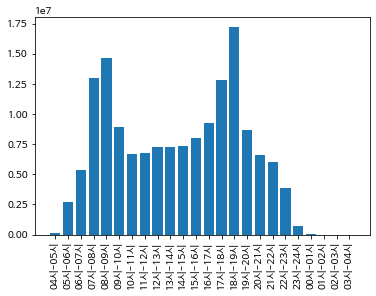

In [45]:
x = df_in_time.index
y = df_in_time.values
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

### 지하철역별 승차건수

In [58]:
df_in_copy['역합계'].sort_values(ascending=False)[1:11].to_frame()

,역합계
지하철역,
강남,1874711.0
잠실(송파구청),1539356.0
신림,1503604.0
구로디지털단지,1331304.0
홍대입구,1247932.0
선릉,1181228.0
서울대입구(관악구청),1121312.0
신도림,1110482.0
삼성(무역센터),1076280.0


## 시간대별 하차 현황

### 하차정보 집계 테이블 만들기

In [47]:
# df_out_202108카피하여 사용하기
df_out_copy = df_out_202108.copy()

In [48]:
# 인덱스 변경('지하철역')
df_out_copy.set_index('지하철역', inplace=True)

In [49]:
# 컬럼 삭제('사용월','호선명','지하철역')
df_out_copy.drop(['사용월','호선명'], axis=1, inplace=True)

In [50]:
df_out_copy.head(2)

,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
지하철역,,,,,,,,,,,,,,,,,,,,,
동대문,11,1815,5352,9885,19783,19192,17298,19346,19492,18295,...,16304,15398,10356,8870,7191,5983,1043,2,2,0
동묘앞,3,918,4614,8004,18779,15213,17602,21823,23065,24178,...,9210,5827,3835,3839,3706,1759,827,0,0,0


In [51]:
# 행,열 합계

In [52]:
df_out_copy.loc['시간대합계',:] = df_out_copy.sum(axis=0)
df_out_copy.tail(2)

,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
지하철역,,,,,,,,,,,,,,,,,,,,,
회기,12.0,3419.0,10520.0,24212.0,40739.0,26807.0,23533.0,21253.0,24327.0,27639.0,...,62992.0,50037.0,30138.0,30912.0,31496.0,12009.0,1645.0,0.0,0.0,0.0
시간대합계,1644.0,706189.0,3603606.0,8042590.0,17604264.0,11402630.0,7146549.0,6666215.0,7062738.0,7449305.0,...,16007443.0,12354319.0,7093483.0,6338999.0,5217987.0,2216218.0,214094.0,66.0,12.0,1.0


In [53]:
df_out_copy['역합계'] = df_out_copy.sum(axis=1)
df_out_copy.head(2)

,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,...,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시,역합계
지하철역,,,,,,,,,,,,,,,,,,,,,
동대문,11.0,1815.0,5352.0,9885.0,19783.0,19192.0,17298.0,19346.0,19492.0,18295.0,...,15398.0,10356.0,8870.0,7191.0,5983.0,1043.0,2.0,2.0,0.0,260656.0
동묘앞,3.0,918.0,4614.0,8004.0,18779.0,15213.0,17602.0,21823.0,23065.0,24178.0,...,5827.0,3835.0,3839.0,3706.0,1759.0,827.0,0.0,0.0,0.0,235014.0


### 시간대별 하차 건수

In [54]:
df_out_time = df_out_copy.loc['시간대합계'][:-1]

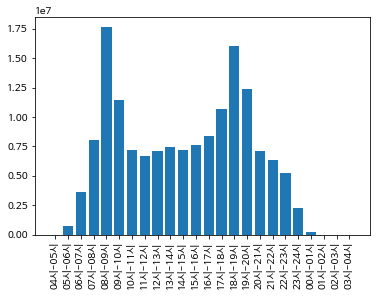

In [55]:
x = df_out_time.index
y = df_out_time.values
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

### 지하철역별 하차건수

In [57]:
df_out_copy.역합계.sort_values(ascending=False)[1:11].to_frame()

,역합계
지하철역,
강남,1819150.0
잠실(송파구청),1514327.0
신림,1467939.0
구로디지털단지,1339493.0
홍대입구,1273453.0
역삼,1154897.0
서울대입구(관악구청),1105337.0
신도림,1082008.0
삼성(무역센터),1077253.0
